In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

C:\Users\Komati Satya\AppData\Local\Temp\ipykernel_21588\1846353887.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv("Csv files/House.csv")
df

,area,age,bedrooms,cost
0,1000,10.0,3,120000
1,2000,8.0,5,230000
2,3500,NaN,2,340000
3,4000,27.0,5,440000
4,5000,15.0,6,430000


In [8]:
import math
age_median=math.floor(df.age.median())
age_median

12

In [10]:
df.age=df.age.fillna(age_median)
df

,area,age,bedrooms,cost
0,1000,10.0,3,120000
1,2000,8.0,5,230000
2,3500,12.0,2,340000
3,4000,27.0,5,440000
4,5000,15.0,6,430000


In [12]:
reg=linear_model.LinearRegression()
reg.fit(df.drop('cost',axis='columns'),df.cost)

LinearRegression()

In [13]:
reg.coef_

array([  70.35656935, 4594.7078591 , -279.56854482])

In [14]:
reg.intercept_

28905.029727167974

In [18]:
reg.predict([[3700,7,5]])

C:\Users\Komati Satya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([319989.44861782])

In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns=[f'feature_{i}' for i in range(diabetes.data.shape[1])])
data['target'] = diabetes.target

# Extract features (independent variables) and target (dependent variable)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_train_pred=model.predict(X_train)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print coefficients and evaluation metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Intercept: 151.34560453985995
Mean Squared Error: 2900.1936284934814
R-squared: 0.4526027629719195


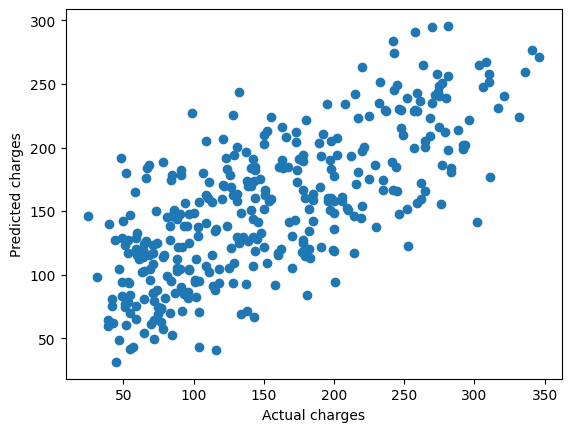

In [30]:
import matplotlib.pyplot as plt
plt.scatter(y_train,y_train_pred)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.show()

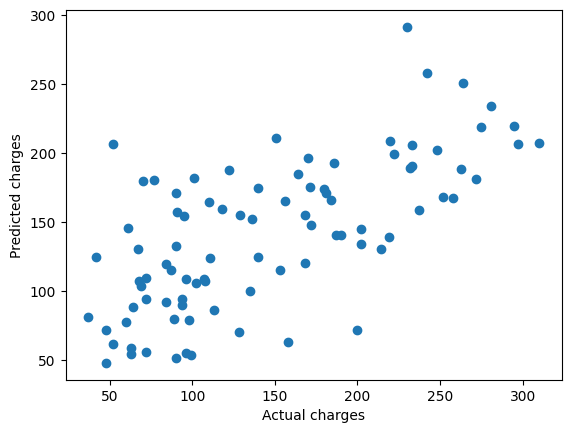

In [31]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.show()